Data loaded successfully.
Calculating correlations (this may take a moment)...
Correlation matrix built.

Top Recommendations for Star Wars: Episode IV - A New Hope (1977):
title
Star Wars: Episode IV - A New Hope (1977)                                         1.000000
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.777970
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.734230
Fugitive, The (1993)                                                              0.482078
Inglourious Basterds (2009)                                                       0.448799
Hunt for Red October, The (1990)                                                  0.421778
Indiana Jones and the Last Crusade (1989)                                         0.410916
Lord of the Rings: The Return of the King, The (2003)                             0.406602
Ghostbusters (a.k.a. Ghost Busters) (1984)                                        0.391613
Ra

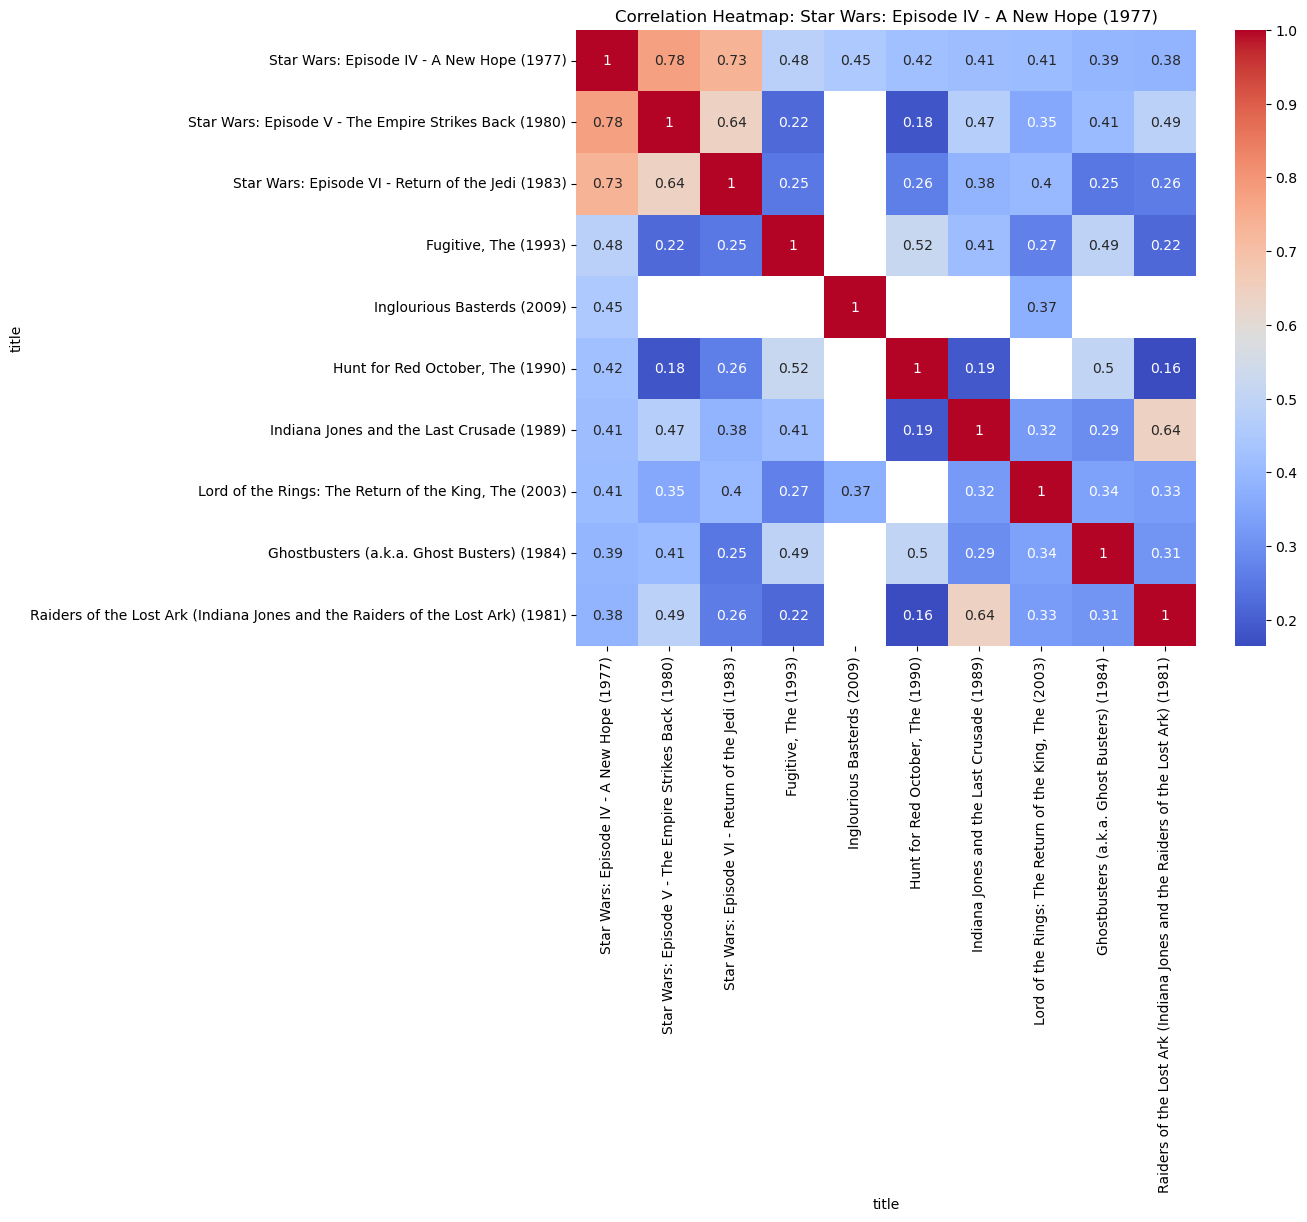

In [1]:
# --- Movie Recommendation System ---
# Author: [Pranshu Sharma]
# Description: Item-based Collaborative Filtering using Pearson Correlation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
# We use 'try-except' to handle file loading robustly
try:
    movies = pd.read_csv('movies.csv')
    ratings = pd.read_csv('ratings.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: CSV files not found. Please upload 'movies.csv' and 'ratings.csv'.")

# 2. Preprocessing
# Merge datasets on 'movieId'
df = pd.merge(ratings, movies, on='movieId')

# Create the User-Item Matrix (Rows: Users, Cols: Movies, Values: Ratings)
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# 3. Correlation Engine
# Calculate similarity between all movies
# min_periods=50 ensures we only rely on movies with >50 shared ratings
print("Calculating correlations (this may take a moment)...")
correlations = movie_matrix.corr(method='pearson', min_periods=50)
print("Correlation matrix built.")

# 4. Recommendation Function
def get_recommendations(movie_name):
    try:
        # Get correlation scores for the movie
        similar_scores = correlations[movie_name]
        # Sort by highest correlation and return top 10
        return similar_scores.dropna().sort_values(ascending=False).head(10)
    except KeyError:
        return None

# 5. Test & Visualize
target_movie = 'Star Wars: Episode IV - A New Hope (1977)' # Change this to test others
recommendations = get_recommendations(target_movie)

if recommendations is not None:
    print(f"\nTop Recommendations for {target_movie}:")
    print(recommendations)
    
    # Visualization
    plt.figure(figsize=(10, 8))
    # Convert index to list to avoid TypeErrors
    top_movies = list(recommendations.index) 
    sns.heatmap(correlations.loc[top_movies, top_movies], annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap: {target_movie}")
    plt.show()
else:
    print(f"Movie '{target_movie}' not found in dataset.")